#### 三个分子的最大公共子结构

18
18
False
[#6](:[#6]:[#6]:,-[#6]-,:[#6]:[#8]:[#6]1:[#6]:[#6](:[#6]:[#6](:[#6]:1:[#6]=[#8])-[#8])-[#8]):[#6]:[#6]


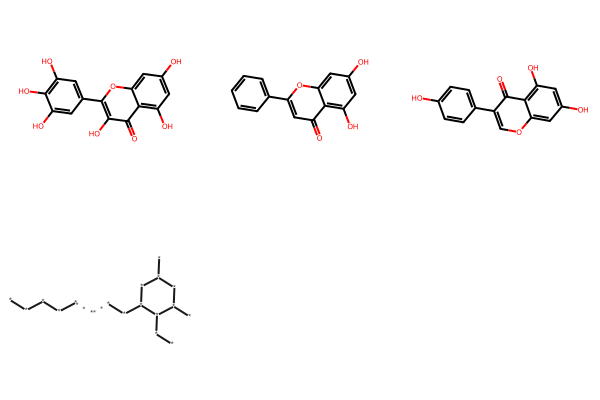

In [1]:
# 导入RDKit相关模块
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS

# 将SMILES字符串转换为RDKit分子对象
Myr = Chem.MolFromSmiles("C1=C(C=C(C(=C1O)O)O)C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O") # Myr
Chr = Chem.MolFromSmiles("C1=CC=C(C=C1)C2=CC(=O)C3=C(C=C(C=C3O2)O)O") # Chr
Gen = Chem.MolFromSmiles("C1=CC(=CC=C1C2=COC3=CC(=CC(=C3C2=O)O)O)O") # Gen

# 将两个分子对象存储在列表中
mols = [Myr, Chr, Gen]

# 使用rdFMCS模块寻找这三个分子的最大公共子结构(MCS)
res = rdFMCS.FindMCS(mols)

# 输出MCS的原子数
print(res.numAtoms)
# 输出MCS的键数
print(res.numBonds)
# 输出搜索是否因为某些原因中断（通常是因为超时）
print(res.canceled)
# 输出表示MCS的SMILES字符串
print(res.smartsString)

# 将MCS的查询分子（一个基于MCS构造的可查询化学结构）添加到分子列表中
mols.append(res.queryMol)

# 使用RDKit的Draw模块生成一个网格图片，展示所有分子（两个原始分子和它们的MCS）
img = Draw.MolsToGridImage(mols)

# 显示图片
img

* 在安装了RDKit的本地Python环境中执行此代码。这将尝试从给定的SMARTS字符串创建一个查询分子，然后将其转换为SMILES字符串。请记住，这种转换可能无法完全捕捉原始SMARTS模式的多样性，因为SMARTS能够描述一系列结构而不是单一分子。

In [3]:
from rdkit import Chem

# MCS的SMARTS字符串
smarts_string = "[#6](:[#6]:[#6]:,-[#6]-,:[#6]:[#8]:[#6]1:[#6]:[#6](:[#6]:[#6](:[#6]:1:[#6]=[#8])-[#8])-[#8]):[#6]:[#6]"

# 从SMARTS字符串创建查询分子
query_mol = Chem.MolFromSmarts(smarts_string)

# 将查询分子转换为SMILES字符串
smiles_string = Chem.MolToSmiles(query_mol)

print(smiles_string)

C:C:C:C:C:CC:O:C1:C:C(O):C:C(O):C:1:C=O


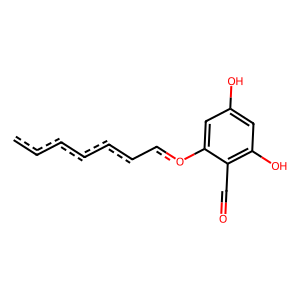

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# 替换为你的SMILES字符串
smiles_string = "C:C:C:C:C:CC:O:C1:C:C(O):C:C(O):C:1:C=O"

# 从SMILES字符串创建分子对象
mol = Chem.MolFromSmiles(smiles_string)

# 使用RDKit的Draw模块生成分子的图像
img = Draw.MolToImage(mol)

# 显示图像
display(img)

#### 两个分子的最大公共子结构

In [ ]:
# 导入RDKit相关模块
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS

# 将SMILES字符串转换为RDKit分子对象
mol1 = Chem.MolFromSmiles("CCCCC(=O)NCC1=CC(=C(C=C1)O)OC")
mol2 = Chem.MolFromSmiles("c1(C=O)cc(OC)c(O)cc1")

# 将两个分子对象存储在列表中
mols = [mol1, mol2]

# 使用rdFMCS模块寻找这两个分子的最大公共子结构(MCS)
res = rdFMCS.FindMCS(mols)

# 输出MCS的原子数
print(res.numAtoms)
# 输出MCS的键数
print(res.numBonds)
# 输出搜索是否因为某些原因中断（通常是因为超时）
print(res.canceled)
# 输出表示MCS的SMILES字符串
print(res.smartsString)

# 将MCS的查询分子（一个基于MCS构造的可查询化学结构）添加到分子列表中
mols.append(res.queryMol)

# 使用RDKit的Draw模块生成一个网格图片，展示所有分子（两个原始分子和它们的MCS）
img = Draw.MolsToGridImage(mols)

# 显示图片
img

#### 多个化合物的最大公共子结构

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFMCS

# 读取CSV文件，假设SMILES字符串在名为"SMILES"的列中
df = pd.read_csv("MGAM_MCS.csv")
smiles_list = df['SMILES'].tolist()

# 将SMILES字符串转换为RDKit分子对象
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if smiles is not None]

# 检查是否有有效的分子对象
if not molecules:
    raise ValueError("No valid molecules found from the SMILES in the CSV file.")

# 使用rdFMCS寻找所有分子的最大公共子结构
mcs_result = rdFMCS.FindMCS(molecules)

# 打印MCS的相关信息
print("Number of atoms in MCS:", mcs_result.numAtoms)
print("Number of bonds in MCS:", mcs_result.numBonds)
print("MCS SMILES string:", mcs_result.smartsString)

#### 优化MCS代码

In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw

# 读取CSV文件，假设SMILES字符串在名为"SMILES"的列中
df = pd.read_csv("MGAM_MCS.csv")
smiles_list = df['SMILES'].tolist()

# 将SMILES字符串转换为RDKit分子对象
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if smiles is not None]

# 检查是否有有效的分子对象
if not molecules:
    raise ValueError("No valid molecules found from the SMILES in the CSV file.")

# 使用rdFMCS寻找所有分子的最大公共子结构
mcs_result = rdFMCS.FindMCS(molecules, 
                            minNumAtoms=5,   # 设置最小原子数为5
                            ringMatchesRingOnly=True, 
                            completeRingsOnly=True)

# 打印MCS的相关信息
print("Number of atoms in MCS:", mcs_result.numAtoms)
print("Number of bonds in MCS:", mcs_result.numBonds)
print("MCS SMILES string:", mcs_result.smartsString)

# 转换MCS结果为可查询的分子对象
mcs_mol = Chem.MolFromSmarts(mcs_result.smartsString)

# 绘制原始分子和MCS
img = Draw.MolsToGridImage(molecules + [mcs_mol], 
                           legends=[f"Mol{i+1}" for i in range(len(molecules))] + ['MCS'])
img.show()

ArgumentError: Python argument types in
    rdkit.Chem.rdFMCS.FindMCS(list)
did not match C++ signature:
    FindMCS(boost::python::api::object mols, RDKit::PyMCSParameters {lvalue} parameters)
    FindMCS(boost::python::api::object mols, bool maximizeBonds=True, double threshold=1.0, unsigned int timeout=3600, bool verbose=False, bool matchValences=False, bool ringMatchesRingOnly=False, bool completeRingsOnly=False, bool matchChiralTag=False, RDKit::AtomComparator atomCompare=rdkit.Chem.rdFMCS.AtomCompare.CompareElements, RDKit::BondComparator bondCompare=rdkit.Chem.rdFMCS.BondCompare.CompareOrder, RDKit::RingComparator ringCompare=rdkit.Chem.rdFMCS.RingCompare.IgnoreRingFusion, std::string seedSmarts='')

In [4]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw

# 读取CSV文件，假设SMILES字符串在名为"SMILES"的列中
df = pd.read_csv("MGAM_MCS.csv")
smiles_list = df['SMILES'].tolist()

# 将SMILES字符串转换为RDKit分子对象
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if smiles is not None]

# 检查是否有有效的分子对象
if not molecules:
    raise ValueError("No valid molecules found from the SMILES in the CSV file.")

# 使用rdFMCS寻找所有分子的最大公共子结构，注意参数传递的修正
mcs_result = rdFMCS.FindMCS(molecules, 
                            maximizeBonds=True,  # 优化设置以便获取最可能的公共结构
                            threshold=1.0,
                            timeout=120,
                            matchValences=False,
                            ringMatchesRingOnly=True, 
                            completeRingsOnly=True,
                            atomCompare=rdFMCS.AtomCompare.CompareElements,  # 指定原子比较方式
                            bondCompare=rdFMCS.BondCompare.CompareOrder)  # 指定键比较方式

# 打印MCS的相关信息
print("Number of atoms in MCS:", mcs_result.numAtoms)
print("Number of bonds in MCS:", mcs_result.numBonds)
print("MCS SMILES string:", mcs_result.smartsString)

# 转换MCS结果为可查询的分子对象
mcs_mol = Chem.MolFromSmarts(mcs_result.smartsString)

# 绘制原始分子和MCS
img = Draw.MolsToGridImage(molecules + [mcs_mol], 
                           legends=[f"Mol{i+1}" for i in range(len(molecules))] + ['MCS'],
                           subImgSize=(300, 300))  # 调整图像大小以更好展示
img.show()

Number of atoms in MCS: 1
Number of bonds in MCS: 0
MCS SMILES string: [#8&!R]


/home/md04/anaconda3/envs/fbw/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


AttributeError: 'Image' object has no attribute 'show'

/home/md04/anaconda3/envs/fbw/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 100. Change the maxMols value to display more.
  warnings.warn(


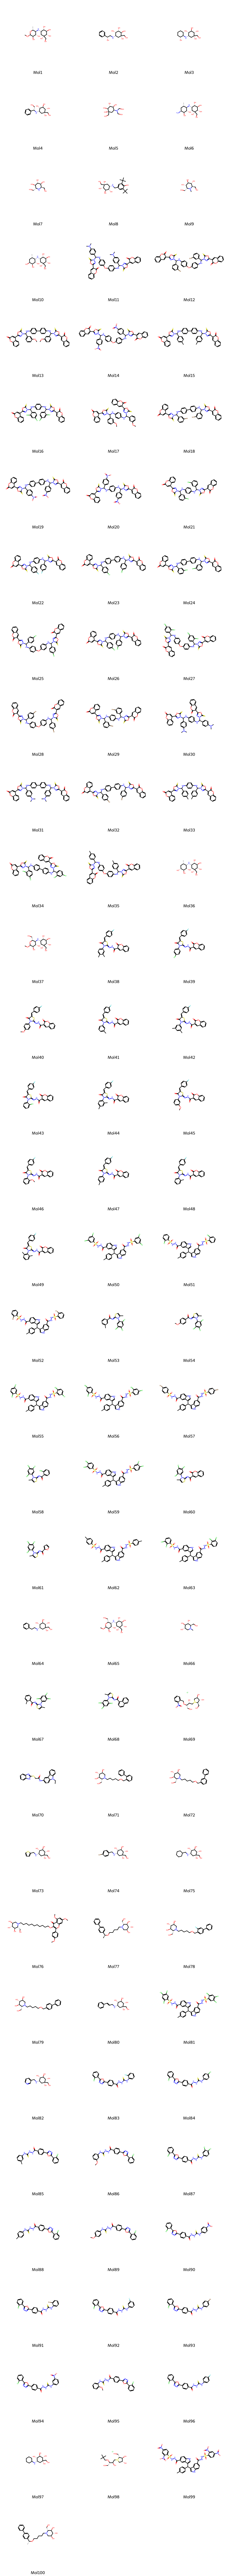

In [9]:
from IPython.display import display
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw

# 读取CSV文件，假设SMILES字符串在名为"SMILES"的列中
df = pd.read_csv("MGAM_MCS.csv")
smiles_list = df['SMILES'].tolist()

# 将SMILES字符串转换为RDKit分子对象
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if smiles is not None]

# 使用rdFMCS寻找所有分子的最大公共子结构
mcs_result = rdFMCS.FindMCS(molecules, ringMatchesRingOnly=True, completeRingsOnly=True)
mcs_mol = Chem.MolFromSmarts(mcs_result.smartsString)

# 绘制原始分子和MCS
img = Draw.MolsToGridImage(molecules + [mcs_mol], 
                           legends=[f"Mol{i+1}" for i in range(len(molecules))] + ['MCS'], 
                           subImgSize=(300, 300),
                           maxMols=100 # 增加到100个分子，根据需要调整
) 
display(img)